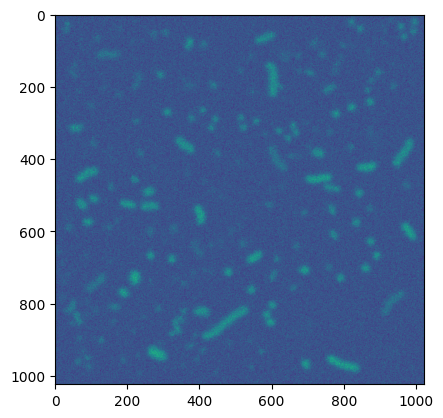

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
from pathlib import Path

tnia_images_path = Path("D:/images")
parent_path=Path(tnia_images_path / r'tnia-python-images\imagesc\2024_07_03_dl_scale_shape')

image = imread(parent_path / 'phantom2.tif') 
plt.imshow(image)

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


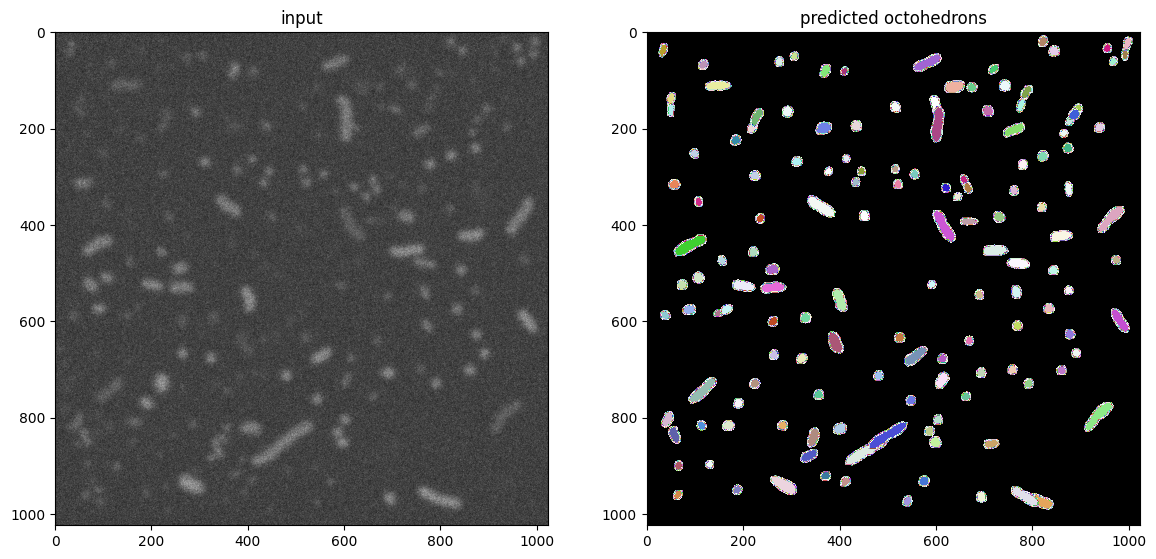

In [7]:
from stardist.models import StarDist2D, Config2D
from tnia.plotting.plt_helper import random_label_cmap
from tnia.plotting.plt_helper import imshow_multi2d
from csbdeep.utils import normalize

model_path = parent_path / 'model'
model_name = 'model_second_try'

model = StarDist2D(None, name=model_name, basedir=model_path)

image_normalized = normalize(image,1,99.8, axis=(0,1))

labels, details = model.predict_instances(image_normalized)
fig = imshow_multi2d([image,labels],['input','predicted octohedrons'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])


In [9]:
import napari
viewer = napari.Viewer()
viewer.add_image(image, name='image')
viewer.add_labels(labels, name='predicted octohedrons')

<Labels layer 'predicted octohedrons' at 0x1fb2efe4eb0>